In [7]:
import pandas as pd
co2_levels = pd.read_csv("dataset/co2_levels.csv")
# Set datestamp column as index
co2_levels = co2_levels.set_index("datestamp").dropna()
# Display first seven rows of co2_levels
print(co2_levels.head(7))

              co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
1958-05-03  316.9
1958-05-17  317.5


# Autocorrelation in time series data

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series.

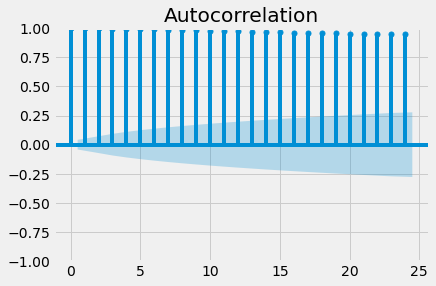

In [8]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels["co2"], lags=24)

# Show plot
plt.show()

# Interpret autocorrelation plots

If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.
In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

<center><img src="images/03.01.png"  style="width: 400px, height: 300px;"/></center>

- They are highly correlated and statistically significant.

# Partial autocorrelation in time series data

Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, …) and its own values lagged by 3 time points (t_4, t_5, t_6, …), but only after removing all effects attributable to lags 1 and 2.

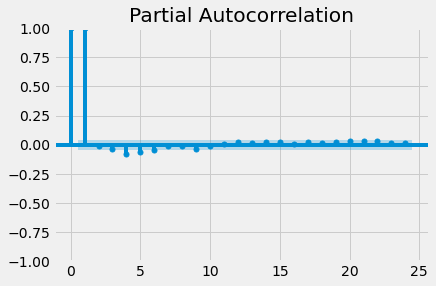

In [9]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels["co2"], lags=24)

# Show plot
plt.show()

# Interpret partial autocorrelation plots

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series. In the partial autocorrelation plot below, at which lag values do we have statistically significant partial autocorrelations?

<center><img src="images/03.02.png"  style="width: 400px, height: 300px;"/></center>


- 0, 1, 4, 5 and 6

# Time series decomposition

When visualizing time series data, you should look out for some distinguishable patterns:

- seasonality: does the data display a clear periodic pattern?
- trend: does the data follow a consistent upwards or downward slope?
- noise: are there any outlier points or missing values that are not consistent with the rest of the data?

In [18]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels, period = int(len(co2_levels)/2))

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29   -0.832060
1958-04-05   -1.063805
1958-04-12   -1.095774
1958-04-19   -1.127654
1958-04-26   -1.858589
                ...   
2001-12-01    1.797032
2001-12-08    1.064972
2001-12-15   -0.167222
2001-12-22    0.200179
2001-12-29   -0.832060
Name: seasonal, Length: 2225, dtype: float64


# Plot individual components

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, `resid`) components.

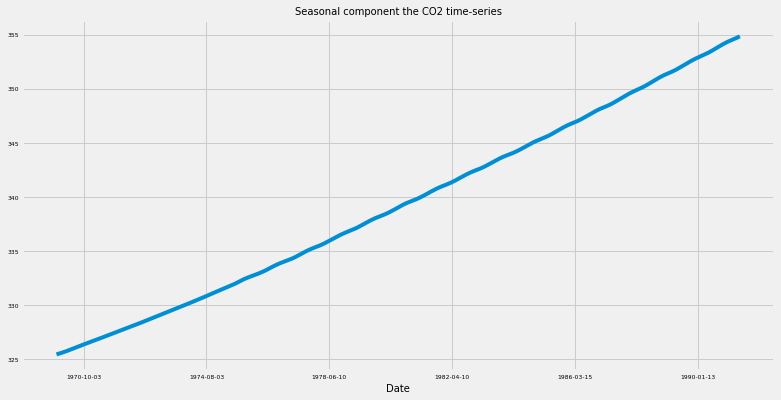

In [19]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

# Visualize the airline dataset

You will now review the contents of chapter 1. You will have the opportunity to work with a new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

In [21]:
airline = pd.read_csv("dataset/airline_passengers.csv", parse_dates=["Month"], index_col="Month")
airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


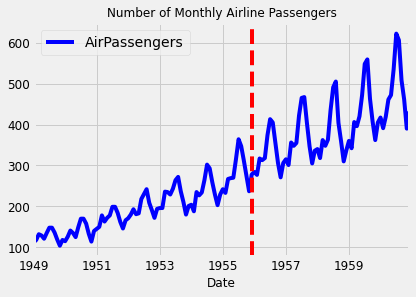

In [23]:
# Plot the time series in your DataFrame
ax = airline.plot(color = "blue", fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

# Analyze the airline dataset

- How to check for the presence of missing values, and how to collect summary statistics of time series data contained in a pandas DataFrame.
- To generate boxplots of your data to quickly gain insight in your data.
- Display aggregate statistics of your data using groupby().

In [24]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


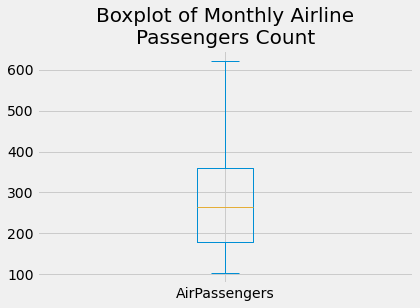

In [25]:
# Display boxplot of airline values
ax = airline.plot(kind='box')

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

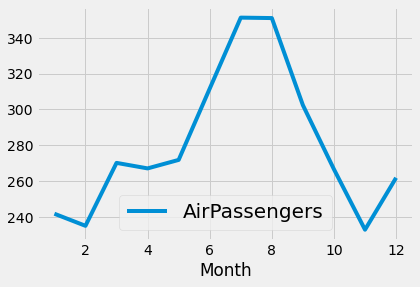

In [26]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

# Time series decomposition of the airline dataset

In this exercise, you will apply time series decomposition to the airline dataset, and visualize the trend and seasonal components.

In [27]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


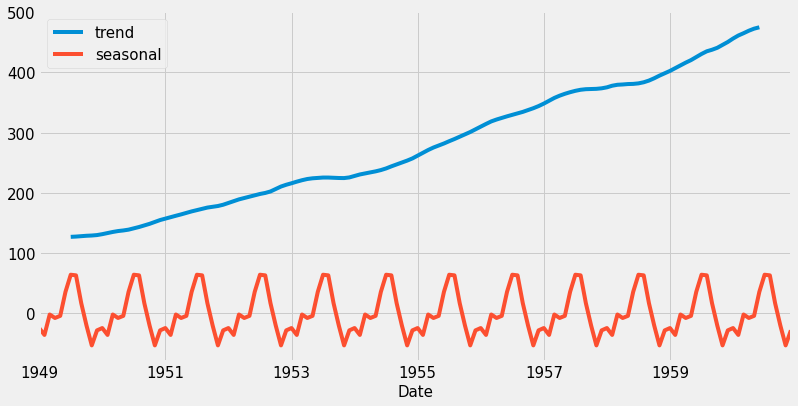

In [30]:
airline_decomposed = pd.DataFrame()
airline_decomposed['trend'] = trend
airline_decomposed['seasonal'] = seasonal
airline_decomposed.index = trend.index
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()